In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
def load_data(data_path):

    with open(data_path, 'r') as fp:
        data = json.load(fp)

    X = np.array(data['mfcc'])
    y = np.array(data['species'])

    return X, y

In [3]:
def prepare_datasets(test_size, validation_size):
    
    X, y = load_data(dataset_path)

    label_encoder = LabelEncoder()
    label_encoder.fit(y)
    new_y = label_encoder.transform(y)
    new_y = new_y.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = test_size)

    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)
    
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [4]:
def build_model(input_shape):
    # sequential model
    model = keras.Sequential()
    # first convolutional layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    # second convolutional layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    # third convolutional layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation = 'relu', input_shape = input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    # flatten layers, feed into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    # output layer
    model.add(keras.layers.Dense(49, activation = 'softmax'))

    return model

In [5]:
def plot_history(history):
    
    fig, axis = plt.subplots(2)
    axis[0].plot(history.history['accuracy'], label = 'train accuracy')
    axis[0].plot(history.history['val_accuracy'], label = 'validation accuracy')
    axis[0].set_ylabel("Accuracy")
    axis[0].legend(loc = 'lower right')
    axis[0].set_title('Accuracy Eval')
    
    axis[1].plot(history.history['loss'], label = 'train error')
    axis[1].plot(history.history['val_loss'], label = 'validation error')
    axis[1].set_ylabel("Error")
    axis[1].set_ylabel('Epoch')
    axis[1].legend(loc = 'upper right')
    axis[1].set_title('Error Eval')
    
    plt.show()

In [6]:
def predict(model, X, y):

    X = X[np.newaxis, ...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis = 1)
    print('Expected index: {}, Predicted index:{}'.format(y, predicted_index))

In [7]:
dataset_path = 'c:/users/ktauf/documents/github/finalproject_data_files/data_5segments_40mfccs.json'


Train on 6308 samples, validate on 1577 samples
Epoch 1/25
6308/6308 - 64s - loss: 3.8736 - accuracy: 0.0442 - val_loss: 3.7602 - val_accuracy: 0.0780
Epoch 2/25
6308/6308 - 39s - loss: 3.6344 - accuracy: 0.0948 - val_loss: 3.5057 - val_accuracy: 0.1414
Epoch 3/25
6308/6308 - 40s - loss: 3.3963 - accuracy: 0.1479 - val_loss: 3.3146 - val_accuracy: 0.1680
Epoch 4/25
6308/6308 - 40s - loss: 3.1896 - accuracy: 0.1906 - val_loss: 3.1465 - val_accuracy: 0.2074
Epoch 5/25
6308/6308 - 40s - loss: 3.0053 - accuracy: 0.2278 - val_loss: 2.9932 - val_accuracy: 0.2517
Epoch 6/25
6308/6308 - 40s - loss: 2.8078 - accuracy: 0.2712 - val_loss: 2.9005 - val_accuracy: 0.2714
Epoch 7/25
6308/6308 - 41s - loss: 2.6304 - accuracy: 0.3125 - val_loss: 2.7833 - val_accuracy: 0.3025
Epoch 8/25
6308/6308 - 41s - loss: 2.4562 - accuracy: 0.3519 - val_loss: 2.7113 - val_accuracy: 0.3120
Epoch 9/25
6308/6308 - 41s - loss: 2.3109 - accuracy: 0.3927 - val_loss: 2.6156 - val_accuracy: 0.3354
Epoch 10/25
6308/6308 - 4

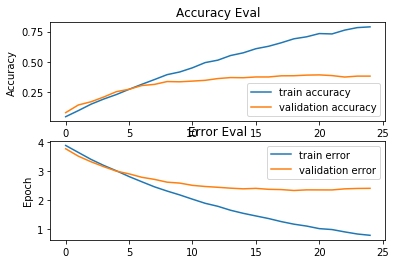

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 257, 38, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 129, 19, 32)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 129, 19, 32)       128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 17, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 9, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 9, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 8, 32)         4

In [8]:
if __name__ == '__main__':

    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    model = build_model(input_shape)

    optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation),
                        batch_size = 32, epochs = 25, verbose = 2)
    
    plot_history(history)
    
    model.summary()
    

In [9]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)




2629/2629 - 4s - loss: 2.4202 - accuracy: 0.3830


In [11]:
X = X_test[300]
y = y_test[300]
predict(model, X, y)

Expected index: [10], Predicted index:[18]
